In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import statistics as stats # https://docs.python.org/3/library/statistics.html#statistics.fmean
#import scipy.stats as spstats
import matplotlib.pyplot as plt

### Validation & Normalization methods ###
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

### ML models ###
from sklearn.linear_model import LogisticRegression, SGDClassifier # C1 loss: log_loss => LogisticRegression with SGD
from sklearn.linear_model import Perceptron # C2
from sklearn.svm import SVC # C3
from sklearn.svm import LinearSVC # C4
from sklearn.tree import DecisionTreeClassifier # C5
from sklearn.ensemble import RandomForestClassifier # C6
from sklearn.neural_network import MLPClassifier # C7

### Metrics ###
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, make_scorer
from imblearn.metrics import geometric_mean_score # https://imbalanced-learn.org/stable/references/generated/imblearn.metrics.geometric_mean_score.html
import time
import timeit # https://stackoverflow.com/questions/17579357/time-time-vs-timeit-timeit

### Pipeline ###
from sklearn.pipeline import make_pipeline , Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

### Analysis ###
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, RFECV , mutual_info_classif

### Custom Modules ###
from functions.data_types import optimize_dtypes
from functions.dataframe_actions import df_info, df_clean, show_value_counts, fill_missing_values
from functions.ml_training import train_classifiers, train_classifiers_tuned

### Other configurations ###
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
# #import warnings library
# import warnings
# # ignore all warnings
# warnings.filterwarnings('ignore')

In [38]:
# to read .csv files from another directory
data_location = "../Data/" # "/<path>"

df = pd.read_csv(data_location + "train_filled.csv")
df = optimize_dtypes(df)
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
0,Female,Good,7.0,2.000000,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.750000,88.4375,28.796875,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Tested positive using home test without a heal...,No
1,Male,Very good,0.0,4.308594,Within past 5 years (2 years but less than 5 y...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Not at all (right now),Yes,Hispanic,Age 50 to 54,1.669922,90.7500,32.531250,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No,No
2,Male,Excellent,2.0,15.000000,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 18 to 24,1.849609,90.7500,26.390625,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,No
3,Male,Fair,0.0,0.000000,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Hispanic,Age 65 to 69,1.650391,93.0000,34.125000,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,No
4,Male,Excellent,0.0,0.000000,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 50 to 54,1.830078,117.9375,35.250000,Yes,No,Yes,No,"Yes, received Tdap",No,No,No


In [39]:
df_mapped = pd.read_csv(data_location + "train_filled_mapped.csv")
df_mapped = optimize_dtypes(df_mapped)
df_mapped.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
0,0,2,7.0,2.000000,3,1,7.0,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6569,1.750000,88.4375,28.796875,0,0,0,0,0,0,1,0
1,1,3,0.0,4.308594,1,1,7.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5054,1.669922,90.7500,32.531250,0,1,0,0,1,0,0,0
2,1,4,2.0,15.000000,2,1,6.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1824,1.849609,90.7500,26.390625,0,0,0,0,1,0,0,0
3,1,1,0.0,0.000000,3,1,8.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,6569,1.650391,93.0000,34.125000,0,0,1,0,1,0,0,0
4,1,4,0.0,0.000000,3,1,6.0,3,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,5054,1.830078,117.9375,35.250000,1,0,1,0,3,0,0,0


In [40]:
#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1 # - HadHeartAttack

# Number of cases with heart attack
hha_yes = len(df[df['HadHeartAttack']=='Yes'])

#Number of cases without heart attack
hha_no = len(df[df['HadHeartAttack']=='No'])

#Rate of heart attacks over all cases
rate = (float(hha_yes)/(length))*100

print ("There are "+ str(len(df))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")
print ("There are {}".format(hha_yes)+" cases with heart attack")
print ("There are {}".format(hha_no)+" cases without heart attack")
print ("The percentage of heart attack cases is: {:.2f}%".format(rate))

There are 353653 cases in this dataset
There are 38 features in this dataset
There are 20086 cases with heart attack
There are 333567 cases without heart attack
The percentage of heart attack cases is: 5.68%


In [41]:
# # plot distribution
# #to see how distribution is in regard to the HadHeartAttack, we need to first split the dataset into two groups
# malignant = df_mapped[df_mapped['HadHeartAttack'] == 0]
# benign = df_mapped[df_mapped['HadHeartAttack'] == 1]

# #also bring features back, basically redefining them again
# features = list(df_mapped.columns[1:39])
# # sns.set(style="whitegrid",palette="muted",font_scale = 1.2)
# # plt.rcParams.update({'font.size': 11})
# fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(18,20))
# axes = axes.ravel()
# for i,plot1 in enumerate(axes):
#     plot1.figure
#     binwidth= (max(df_mapped[features[i]]) - min(df_mapped[features[i]]))/38
#     plot1.hist([benign[features[i]],malignant[features[i]]], bins=np.arange(min(df_mapped[features[i]]), max(df_mapped[features[i]]) + binwidth, binwidth) , # density : If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))),
#                 alpha=0.8, density=False, stacked=True ,edgecolor="black",label=['B','M'])          # so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).If stacked is also True, the sum of the histograms is normalized to 1.
                
#     plot1.legend(loc='upper right')
#     plot1.set_title(features[i])
#     # plot1.grid()
# plt.tight_layout()
# plt.show()
# # https://github.com/bora-pajo/breast-cancer-prediction/blob/master/examples_save1.ipynb

In [42]:
# Separate target variable from feature variables
X_mapped = df_mapped.drop('HadHeartAttack', axis=1, inplace=False)  # Features
y_mapped = df_mapped['HadHeartAttack']     

Text(0.5, 1.0, 'Pearson Correlation Map')

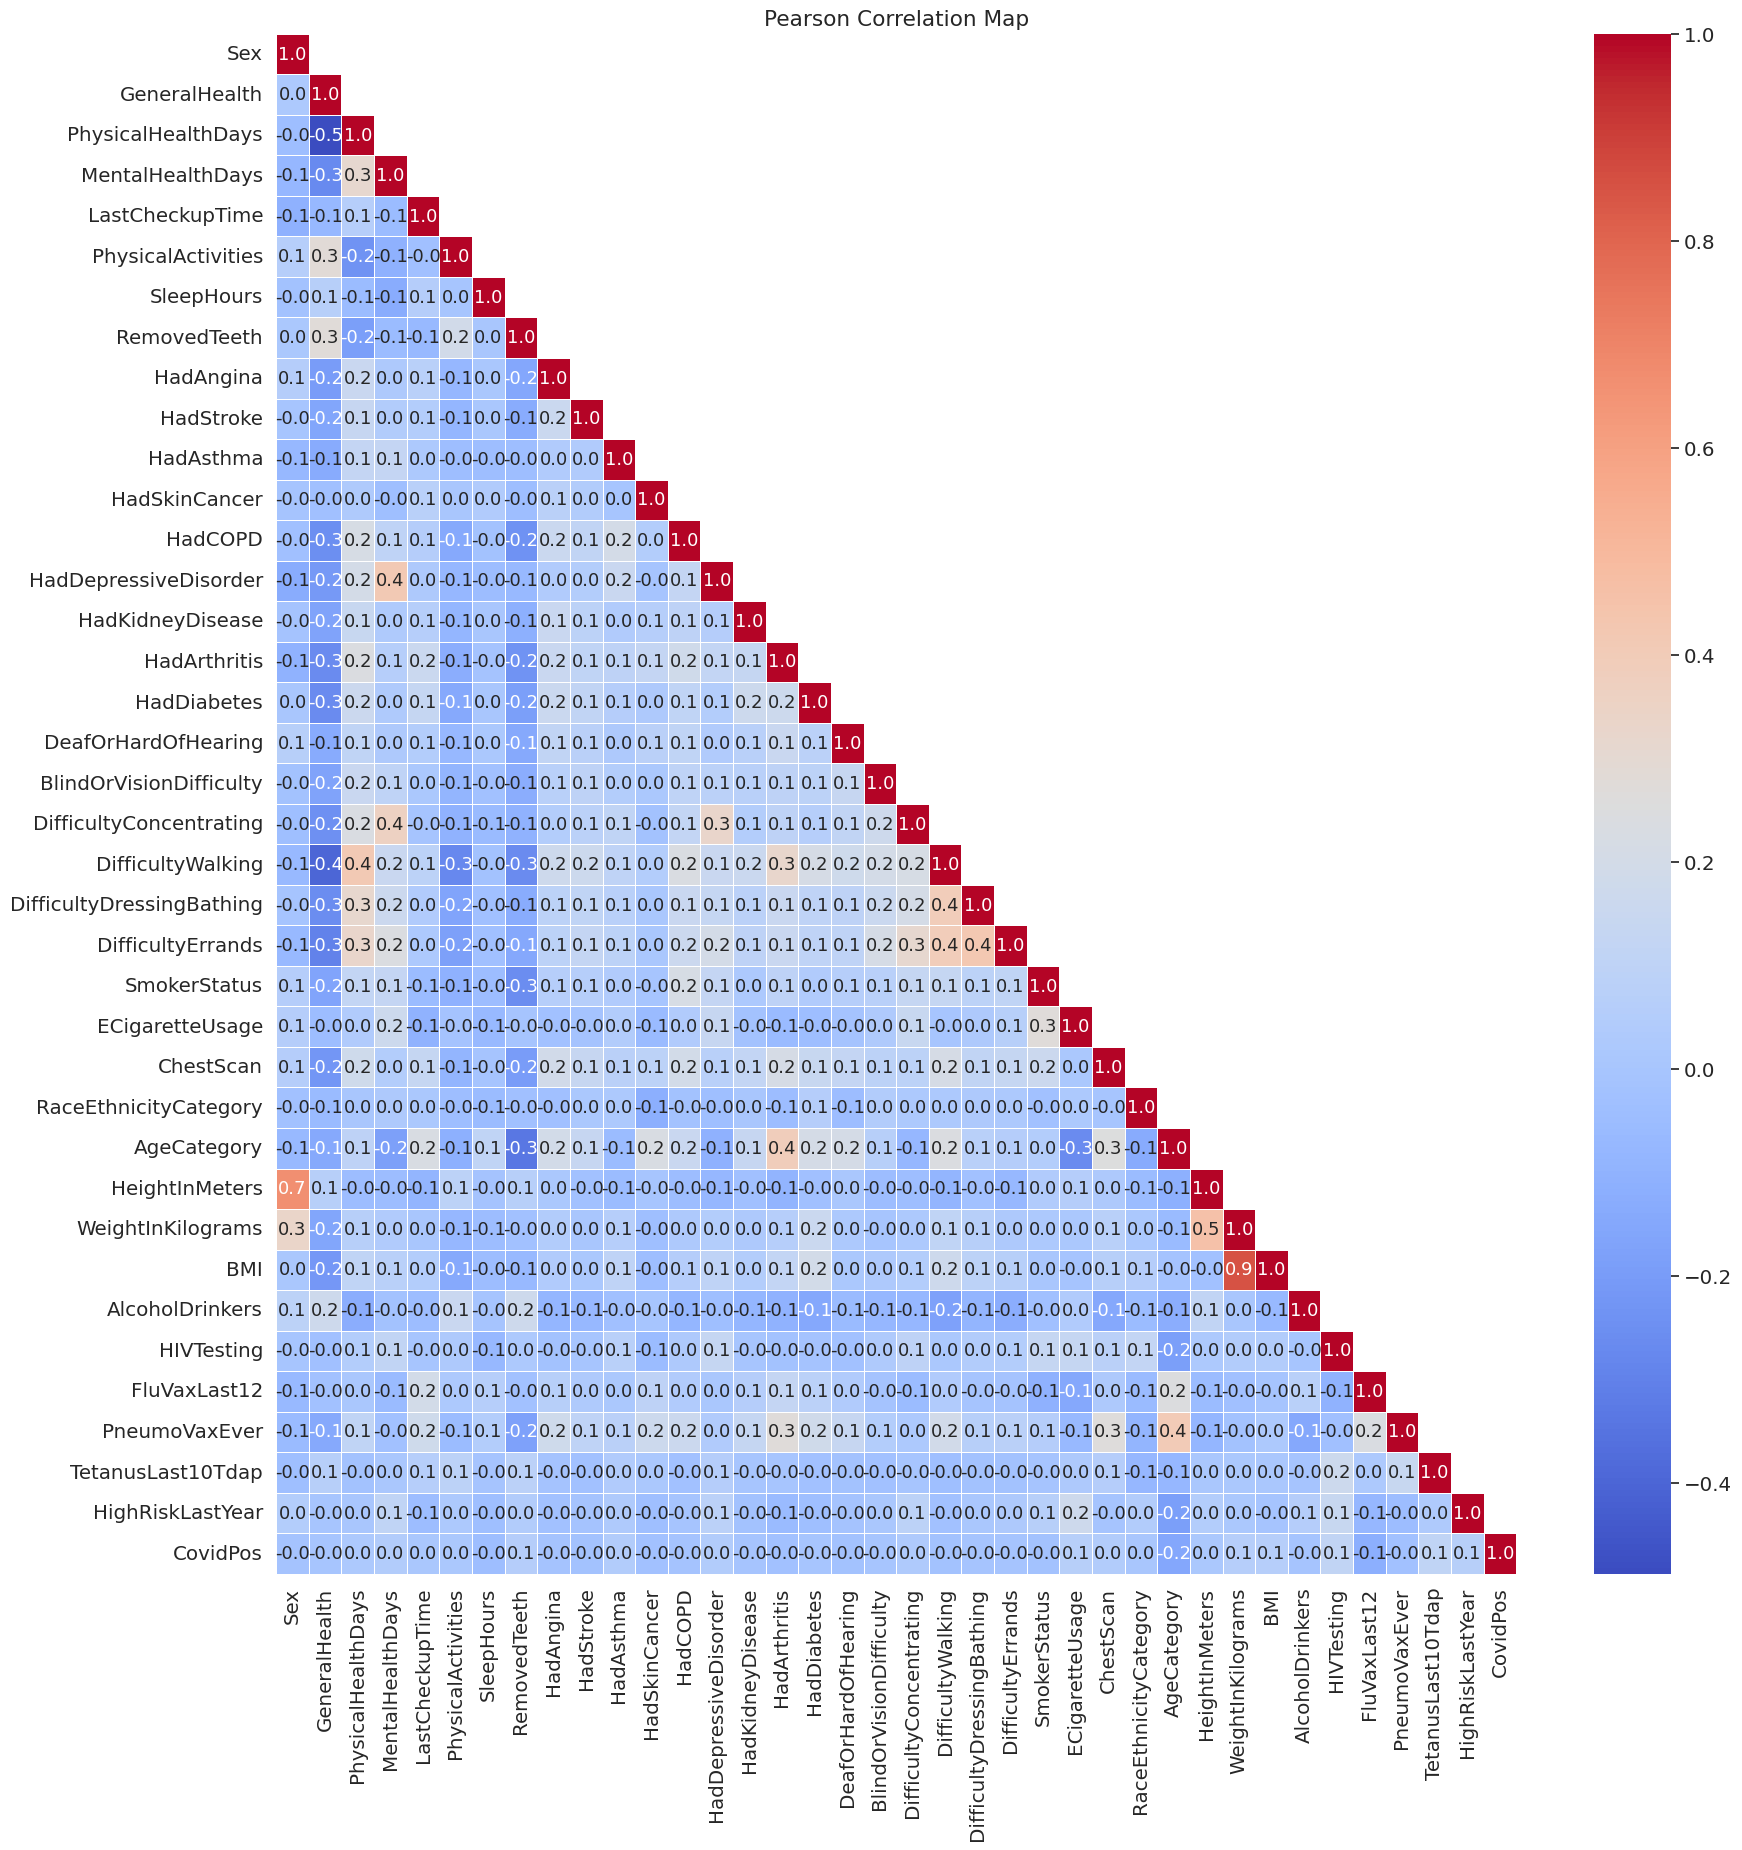

In [43]:
#correlation map
sns.set(style='white',font_scale = 1.3)
mask = np.triu(np.ones_like(X_mapped.corr('pearson'), dtype=bool))
np.fill_diagonal(mask, False)

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_mapped.corr('pearson'),mask=mask,annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm',annot_kws={'size': 13})
plt.title('Pearson Correlation Map')

Text(0.5, 1.0, 'Spearman Correlation Map')

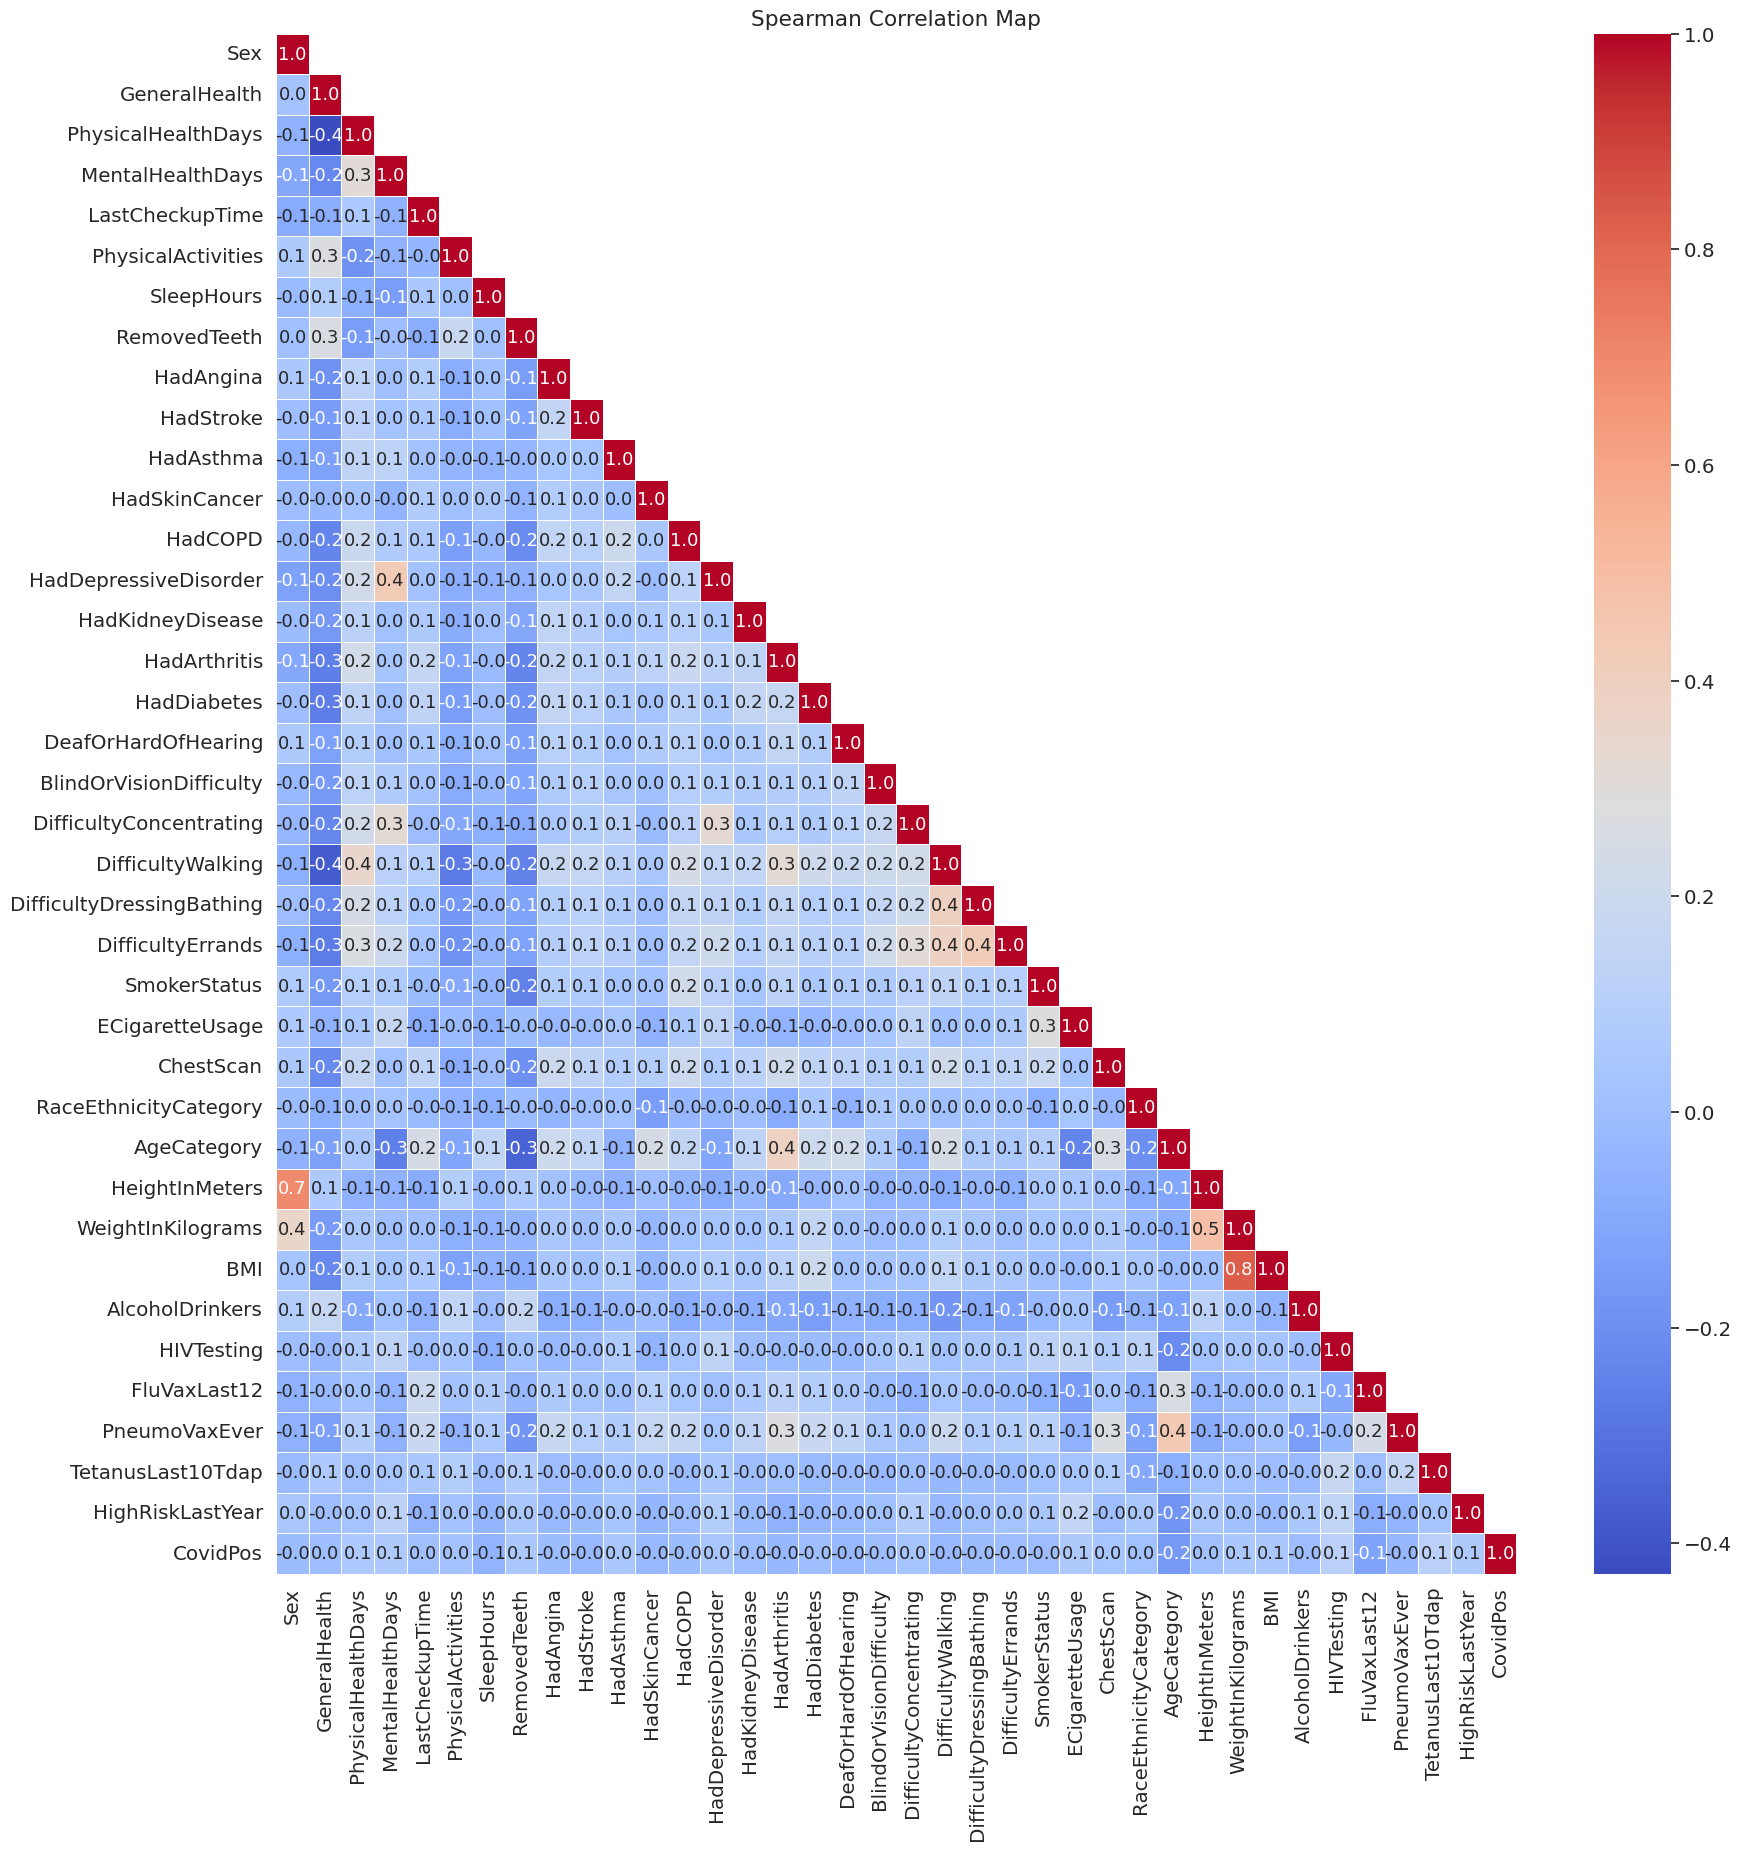

In [44]:
#correlation map
sns.set(style='white',font_scale = 1.3)
mask = np.triu(np.ones_like(X_mapped.corr('spearman'), dtype=bool))
np.fill_diagonal(mask, False)

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_mapped.corr('spearman'),mask=mask,annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm',annot_kws={'size': 13})
plt.title('Spearman Correlation Map')

Text(0.5, 1.0, 'Kendall Correlation Map')

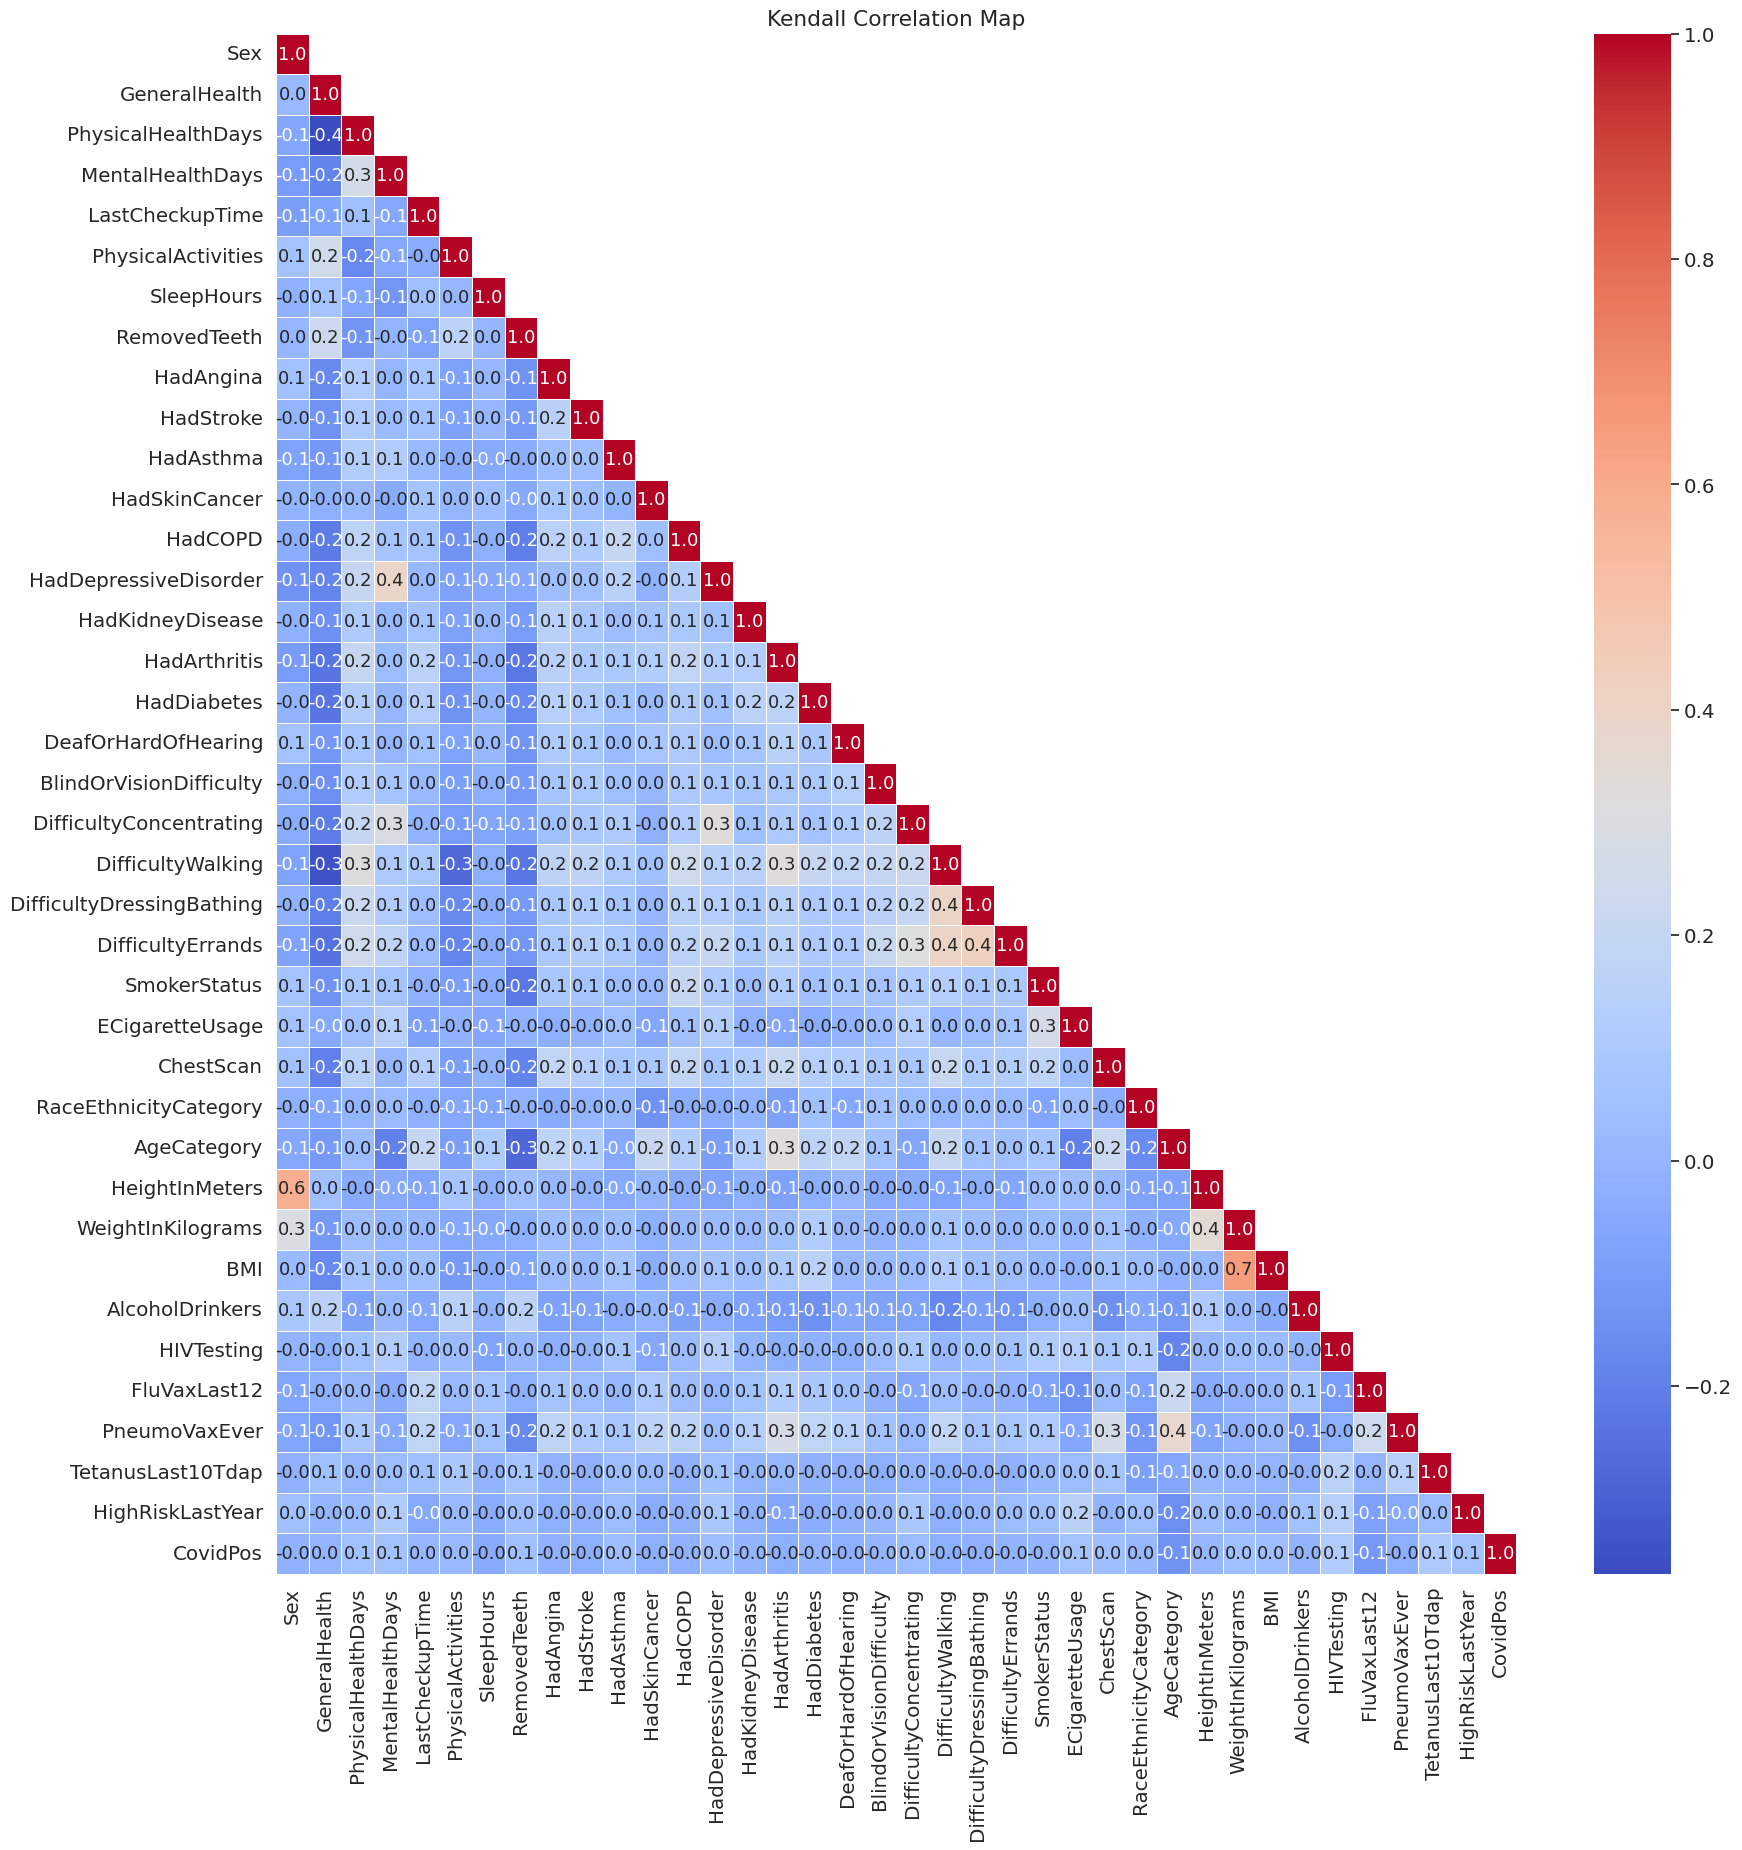

In [45]:
#correlation map
sns.set(style='white',font_scale = 1.3)
mask = np.triu(np.ones_like(X_mapped.corr('kendall'), dtype=bool))
np.fill_diagonal(mask, False)

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_mapped.corr('kendall'),mask=mask,annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm',annot_kws={'size': 13})
plt.title('Kendall Correlation Map')

In [46]:
# *** Functions for Mutual Information (score and plot) ***
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=13)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#:~:text=Mutual%20information%20(MI)%20%5B1,higher%20values%20mean%20higher%20dependency.
# https://www.kaggle.com/code/ryanholbrook/mutual-information/tutorial
# https://www.kaggle.com/code/palazar/exercise-mutual-information/edit

HadAngina                    0.044994
SleepHours                   0.026436
ChestScan                    0.022635
BMI                          0.021712
WeightInKilograms            0.021600
AgeCategory                  0.018913
HeightInMeters               0.018004
GeneralHealth                0.017132
PhysicalHealthDays           0.016768
PneumoVaxEver                0.014950
RemovedTeeth                 0.013676
HadStroke                    0.010227
DifficultyWalking            0.010130
HadDiabetes                  0.008826
MentalHealthDays             0.008701
SmokerStatus                 0.008473
HadArthritis                 0.007611
HadCOPD                      0.007205
AlcoholDrinkers              0.006607
HadKidneyDisease             0.004480
DeafOrHardOfHearing          0.003917
PhysicalActivities           0.003361
DifficultyErrands            0.003349
LastCheckupTime              0.002800
DifficultyDressingBathing    0.002578
Sex                          0.002503
BlindOrVisio

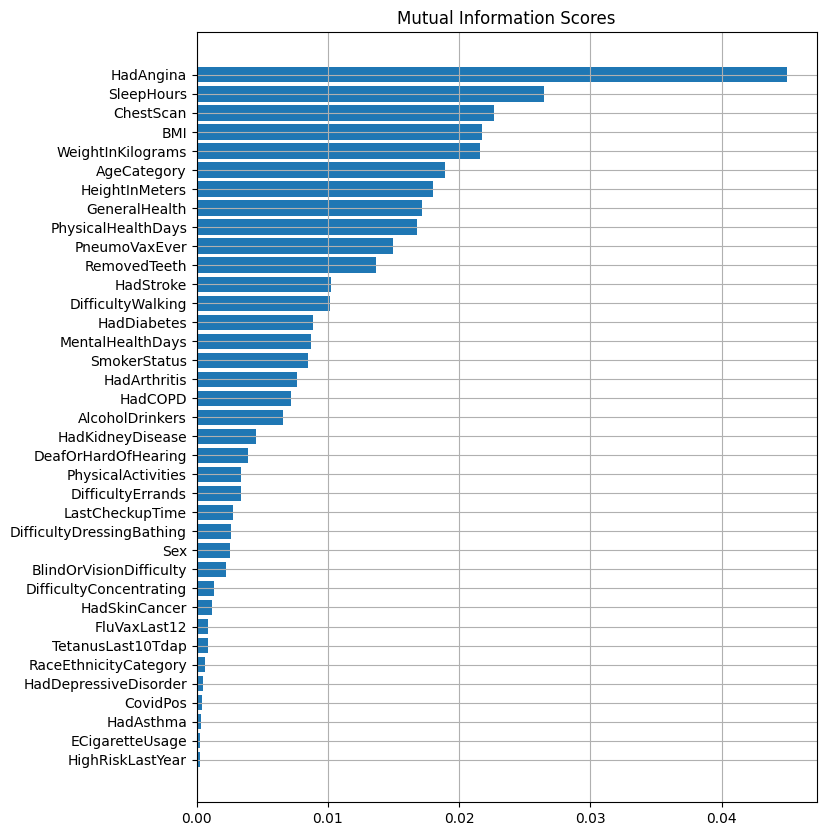

In [47]:
mi_scores = make_mi_scores(X_mapped, y_mapped)
print(mi_scores.head(37))
# print(mi_scores.tail(20))  # uncomment to see bottom 20
plt.style.use('default')
plt.figure(dpi=100, figsize=(8, 10))
plt.grid()
plot_mi_scores(mi_scores.head(37))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20